# Project 1: Zillow's Home Value Prediction (Zestimate)

By Elyijah Potter, Sufiyan Mohammed, David George
<br>

<br>

# Part 1: Business Undestanding

<br>

Zillow is a real-estate marketplace company aimed at providing accurate data on homes throughout the United States to aid in the home buying and rental process. A key aspect of this data includes the estimated value of a given home, given a series of property features. 

To monitor the accuracy of their value predictions, Zillow tracks the log-error between their "Zestimate" and the actual sale price of a home. This is defined as:

$$
 logerror = log(Zestimate) - log(SalePrice)
$$

In an effort to improve their prediction algorithm, Zillow has tasked us to predict this log-error for real estate properties in three California counties (Los Angeles County, Orange County, and Ventura County) for 2017 using real estate property data from 2016.

To measure the success of our model, we will compare our prediction of log error against the actual provided log error value for each property. This will be calculated using the ASE (Average Squared Error) of our predictions verses Zillow's log error calculation.

Our goal is to construct a model that can minimize the ASE and accurately predict the log error between Zillow's home value estimate and the actual sale price of a given home. This model will not only help Zillow to better understand their home value prediction discrepancy, but should aid in the improvement of their prediction algorithm in the future.

# Part 2: Data Understanding

### Section 2.1: Attribute Definitions

<br>

*(All descriptions pulled from data library)*

<br>

| Feature | Data Type | Description |
| --- | --- | --- |
| airconditioningtypeid | Nominal | Type of cooling system present in the home (if any) |
| architecturalstyletypeid | Nominal | Architectural style of the home (i.e. ranch, colonial, split-level, etc…) |
| basementsqft | Ratio | Finished living area below or partially below ground level |
| bathroomcnt | Ordinal | Number of bathrooms in home including fractional bathrooms |
| bedroomcnt | Ordinal | Number of bedrooms in home |
| buildingqualitytypeid | Ordinal | Overall assessment of condition of the building from best (lowest) to worst (highest) |
| buildingclasstypeid | Nominal | The building framing type (steel frame, wood frame, concrete/brick) |
| calculatedbathnbr | Ordinal | Number of bathrooms in home including fractional bathroom |
| decktypeid | Nominal | Type of deck (if any) present on parcel |
| threequarterbathnbr | Ordinal | Number of 3/4 bathrooms in house (shower + sink + toilet) |
| finishedfloor1squarefeet | Ratio | Size of the finished living area on the first (entry) floor of the home |
| calculatedfinishedsquarefeet | Ratio | Calculated total finished living area of the home |
| finishedsquarefeet6 | Ratio | Base unfinished and finished area |
| finishedsquarefeet12 | Ratio | Finished living area |
| finishedsquarefeet13 | Ratio | Perimeter living area |
| finishedsquarefeet15 | Ratio | Total area |
| finishedsquarefeet50 | Ratio | Size of the finished living area on the first (entry) floor of the home |
| fips | Nominal | Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details |
| fireplacecnt | Ordinal | Number of fireplaces in a home (if any) |
| fireplaceflag | Nominal | Is a fireplace present in this home |
| fullbathcnt | Ordinal | Number of full bathrooms (sink, shower + bathtub, and toilet) present in home |
| garagecarcnt | Ordinal | Total number of garages on the lot including an attached garage |
| garagetotalsqft | Ratio | Total number of square feet of all garages on lot including an attached garage |
| hashottuborspa | Nominal | Does the home have a hot tub or spa |
| heatingorsystemtypeid | Nominal | Type of home heating system |
| latitude | Interval | Latitude of the middle of the parcel multiplied by 10e6 |
| longitude | Interval | Longitude of the middle of the parcel multiplied by 10e6 |
| lotsizesquarefeet | Ratio | Area of the lot in square feet |
| numberofstories | Ordinal | Number of stories or levels the home has |
| parcelid | Nominal | Unique identifier for parcels (lots) |
| poolcnt | Ordinal | Number of pools on the lot (if any) |
| poolsizesum | Ratio | Total square footage of all pools on property |
| pooltypeid10 | Nominal | Spa or Hot Tub |
| pooltypeid2 | Nominal | Pool with Spa/Hot Tub |
| pooltypeid7 | Nominal | Pool without hot tub |
| propertycountylandusecode | Nominal | County land use code i.e. it's zoning at the county level |
| propertylandusetypeid | Nominal | Type of land use the property is zoned for |
| propertyzoningdesc | String | Description of the allowed land uses (zoning) for that property |
| rawcensustractandblock | Nominal | Census tract and block ID combined - also contains blockgroup assignment by extension |
| censustractandblock | Nominal | Census tract and block ID combined - also contains blockgroup assignment by extension |
| regionidcounty | Nominal | County in which the property is located |
| regionidcity | Nominal | City in which the property is located (if any) |
| regionidzip | Nominal | Zip code in which the property is located |
| regionidneighborhood | Nominal | Neighborhood in which the property is located |
| roomcnt | Ordinal | Total number of rooms in the principal residence |
| storytypeid | Nominal | Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details. |
| typeconstructiontypeid | Nominal | What type of construction material was used to construct the home |
| unitcnt | Ordinal | Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...) |
| yardbuildingsqft17 | Ratio | Patio in yard |
| yardbuildingsqft26 | Ratio | Storage shed/building in yard |
| yearbuilt | Interval | The Year the principal residence was built |
| taxvaluedollarcnt | Ratio | The total tax assessed value of the parcel |
| structuretaxvaluedollarcnt | Ratio | The assessed value of the built structure on the parcel |
| landtaxvaluedollarcnt | Ratio | The assessed value of the land area of the parcel |
| taxamount | Ratio | The total property tax assessed for that assessment year |
| assessmentyear | Interval | The year of the property tax assessment |
| taxdelinquencyflag | Nominal | Property taxes for this parcel are past due as of 2015 |
| taxdelinquencyyear | Interval | Year for which the unpaid propert taxes were due |
| logerror | Ratio | Log error of Zillow's estimate of sale price: log(Zestiamte) - log(SalePrice) |

<br>

<br>


### ID Value Definitions:

<br>

| HeatingOrSystemTypeID | Description |
| --- | --- | 
| 1 | Baseboard |
| 2 | Central |
| 3 | Coal |
| 4 | Convection |
| 5 | Electric |
| 6 | Forced air |
| 7 | Floor/Wall |
| 8 | Gas |
| 9 | Geo Thermal |
| 10 | Gravity |
| 11 | Heat Pump |
| 12 | Hot Water |
| 13 | None |
| 14 | Other |
| 15 | Oil |
| 16 | Partial |
| 17 | Propane |
| 18 | Radiant |
| 19 | Steam |
| 20 | Solar |
| 21 | Space/Suspended |
| 22 | Vent |
| 23 | Wood Burning |
| 24 | Yes |
| 25 | Zone |

<br>

<br>

| PropertyLandUseTypeID | Description |
| --- | --- | 
| 31 | Commercial/Office/Residential Mixed Used |
| 46 | Multi-Story Store |
| 47 | Store/Office (Mixed Use) |
| 246 | Duplex (2 Units, Any Combination) |
| 247 | Triplex (3 Units, Any Combination) |
| 248 | Quadruplex (4 Units, Any Combination) |
| 260 | Residential General |
| 261 | Single Family Residential |
| 262 | Rural Residence |
| 263 | Mobile Home |
| 264 | Townhouse |
| 265 | Cluster Home |
| 266 | Condominium |
| 267 | Cooperative |
| 268 | Row House |
| 269 | Planned Unit Development |
| 270 | Residential Common Area |
| 271 | Timeshare |
| 273 | Bungalow |
| 274 | Zero Lot Line |
| 275 | Manufactured, Modular, Prefabricated Homes |
| 276 | Patio Home |
| 279 | Inferred Single Family Residential |
| 290 | Vacant Land - General |
| 291 | Residential Vacant Land |

<br>

<br>

| StoryTypeID | Description |
| --- | --- | 
| 1 | Attic & Basement |
| 2 | Attic |
| 3 | Bi-Level with Attic & Basement |
| 4 | Bi-Level |
| 5 | Bi-Level with Attic |
| 6 | Bi-Level with Basement |
| 7 | Basement |
| 8 | Split Entry with Attic & Basement |
| 9 | Split Foyer with Attic & Basement |
| 10 | Level with Attic & Basement |
| 11 | Level with Attic |
| 12 | Level with Basement |
| 13 | Level |
| 14 | Multi-Level with Attic & Basement |
| 15 | Multi-Level |
| 16 | Multi-Level with Attic |
| 17 | Multi-Level with Basement |
| 18 | Split Level with Attic & Basement |
| 19 | Single Level with Attic & Basement |
| 20 | Split Entry with Attic |
| 21 | Split Entry with Basement |
| 22 | Split Foyer with Attic |
| 23 | Split Foyer with Basement |
| 24 | Single Level with Attic |
| 25 | Single Level with Basement |
| 26 | Single Level |
| 27 | Split Level with Attic |
| 28 | Split Level with Basement |
| 29 | Split Entry |
| 30 | Split Foyer |
| 31 | Split Level |
| 32 | Tri-level with Attic & Basement |
| 33 | Tri-level with Attic |
| 34 | Tri-level with Basement |
| 35 | Tri-level |

<br>

<br>

| AirConditioningTypeID | Description |
| --- | --- | 
| 1 | Central |
| 2 | Chilled Water |
| 3 | Evaporative Cooler |
| 4 | Geo Thermal |
| 5 | None |
| 6 | Other |
| 7 | Packaged AC Unit |
| 8 | Partial |
| 9 | Refrigeration |
| 10 | Ventilation |
| 11 | Wall Unit |
| 12 | Window Unit |
| 13 | Yes |

<br>

| ArchitecturalStyleTypeID | Description |
| --- | --- | 
| 1 | A-Frame |
| 2 | Bungalow |
| 3 | Cape Cod |
| 4 | Cottage |
| 5 | Colonial |
| 6 | Custom |
| 7 | Contemporary |
| 8 | Conventional |
| 9 | Dome |
| 10 | French Provincial |
| 11 | Georgian |
| 12 | High Rise |
| 13 | Historical |
| 14 | Log Cabin/Rustic |
| 15 | Mediterranean |
| 16 | Modern |
| 17 | Mansion |
| 18 | English |
| 19 | Other |
| 20 | Prefab |
| 21 | Ranch/Rambler |
| 22 | Raised Ranch |
| 23 | Spanish |
| 24 | Traditional |
| 25 | Tudor |
| 26 | Unfinished/Under Construction |
| 27 | Victorian |

<br>

<br>

| TypeConstructionTypeID | Description |
| --- | --- | 
| 1 | Adobe |
| 2 | Brick |
| 3 | Concrete Block |
| 4 | Concrete |
| 5 | Dome |
| 6 | Frame |
| 7 | Heavy |
| 8 | Log |
| 9 | Light |
| 10 | Metal |
| 11 | Manufactured |
| 12 | Mixed |
| 13 | Masonry |
| 14 | Other |
| 15 | Steel |
| 16 | Stone |
| 17 | Tilt-Up |
| 18 | Wood |

<br>

<br>

| BuildingClassTypeID | Description |
| --- | --- | 
| 1 | Buildings having fireproofed structural steel frames carrying all wall, floor and roof loads. Wall, floor and roof structures are built of non-combustible materials. |
| 2 | Buildings having fireproofed reinforced concrete frames carrying all wall floor and roof loads which are all non-combustible. |
| 3 | Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are built of combustible materials. Floor may be concrete or wood frame. |
| 4 | Buildings having wood or wood and steel frames |
| 5 | Specialized buildings that do not fit in any of the above categories |

## Section 2.2: Data Quality

### Creating Categorical Response and Joining Data Sets

In [3]:
# Import the data 

import pandas as pd

prop = pd.read_csv(r'C:\Users\david\Documents\SMU Masters\DS 7331\Lab 1\properties_2016.csv')
error = pd.read_csv(r'C:\Users\david\Documents\SMU Masters\DS 7331\Lab 1\train_2016_v2.csv')

C:\Users\david\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Change logerror value into a categorical variable in error dataframe

def error_check (row):
    if abs(row['logerror']) <= 0.1:
        return 'A'
    if abs(row['logerror']) <= 0.3:
        return 'B'
    if abs(row['logerror']) <= 0.5:
        return 'C'
    return 'F'

error['Prediction Grade'] = error.apply(lambda row: error_check(row), axis = 1)

# Drop original logerror variable

error = error.drop('logerror', axis=1)


In [5]:
z_data = pd.merge(prop, error, on = 'parcelid')

z_data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transactiondate,Prediction Grade
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,2016-01-27,A
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,2016-03-30,A
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,2016-05-27,A
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,2016-06-07,A
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,2016-08-08,A


### Checking for Duplicates

In [6]:
# Check for duplicate rows - None found
z_data.duplicated(keep = False).sum()

# Check for duplicate parcelids
# Duplicate pull script found here: https://stackoverflow.com/questions/9835762/how-do-i-find-the-duplicates-in-a-list-and-create-another-list-with-them
seen = set()
dupes = []

for x in z_data['parcelid']:
    if x in seen:
        dupes.append(x)
    else:
        seen.add(x)

dupes = pd.DataFrame(dupes, columns = ['parcelid'])
dup_parcelid = pd.merge(z_data, dupes, on = 'parcelid')

# It appears that the duplicate parcelid's are examples of the same property being listed twice in the same year. This is indicated by duplicated properties having the same attribute values except for transaction date.
# There is parcelid = 11842707 which was sold 3 times in the same year, which is not common behavior, but should not negatively affect our predictive power. We will continue forward with these values.



### Changing Appropriate Columns into Categorical Variables

In [7]:
z_data['heatingorsystemtypeid']=z_data['heatingorsystemtypeid'].astype('category')
z_data['propertycountylandusecode']=z_data['propertycountylandusecode'].astype('category')
z_data['storytypeid']=z_data['storytypeid'].astype('category')
z_data['airconditioningtypeid']=z_data['airconditioningtypeid'].astype('category')
z_data['architecturalstyletypeid']=z_data['architecturalstyletypeid'].astype('category')
z_data['typeconstructiontypeid']=z_data['typeconstructiontypeid'].astype('category')
z_data['buildingclasstypeid']=z_data['buildingclasstypeid'].astype('category')

### Missing Values

In [8]:
z_data.isnull().sum()


parcelid                            0
airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
latitude                            0
longitude                           0
lotsizesquar


**Potentially Problematic missing values:**

| Feature | Missing Values | 
| --- | --- |
| propertycountylandusecode | 1 |
| taxvaluedollarcnt | 1 |
| landtaxvaluedollarcnt | 1 |
| taxamount | 6 |
| regionidzip | 35 |
| structuretaxvaluedollarcnt | 380 |
| calculatedfinishedsquarefeet | 661 |
| yearbuilt | 756 |
| regionidcity | 1803 |
| finishedsquarefeet12 | 4679 |
| lotsizesquarefeet | 10150 |
| unitcnt | 31922 |
| propertyzoningdesc | 31962 |
| buildingqualitytypeid | 32911 |
| finishedfloor1squarefeet | 83419 |
| finishedsquarefeet50 | 83419 |
| finishedsquarefeet15 | 86711 |
| finishedsquarefeet6 | 89854 |
| typeconstructiontypeid | 89976 |
| storytypeid | 90232 |
| finishedsquarefeet13 | 90242 |
| buildingclasstypeid | 90259 |

<br>

It is important to note that if our goal was to predict home prices, it would be important to address all of these null values and find solutions.
In cases where there are minimial null values, like landtaxvaluedollarcnt and taxamount, we will simply remove these rows from our data set. 


In other cases where there are over significant record with null values for a required attribute, such as architecturalstyletypeid and buildingclasstypeid we will need to take a different approach. 
These are too many records to remove, and it is important to take our task into context before estimating these values. Our goal is to predict the error between a home value and Zillow's estimate, given the provided data. 
The missing values noted above were also missing when Zillow created their home price estimate, so it is important to take them into consideration in our model. Estimating them would result in a discrepancy between the data we are using to try to estimate Zillow's error and the data Zillow used to create their esimate, so we will leave them as null.


For our use case, we will determine any attribute with under 10K null values to be in error and remove this row. Any attribute with over 10K null values will be considered valid, since the absence of these values is likely a factor in Zillow's prediction error.

In [9]:
# Removing null values

z_data = z_data[z_data.propertycountylandusecode.notnull()]
z_data = z_data[z_data.taxvaluedollarcnt.notnull()]
z_data = z_data[z_data.landtaxvaluedollarcnt.notnull()]
z_data = z_data[z_data.taxamount.notnull()]
z_data = z_data[z_data.regionidzip.notnull()]
z_data = z_data[z_data.structuretaxvaluedollarcnt.notnull()]
z_data = z_data[z_data.calculatedfinishedsquarefeet.notnull()]
z_data = z_data[z_data.yearbuilt.notnull()]
z_data = z_data[z_data.regionidcity.notnull()]
z_data = z_data[z_data.finishedsquarefeet12.notnull()]

### Investigating for Outliers and Error Values

In [10]:
pd.set_option('display.max_columns', None)
z_data.describe()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,8.381100e+04,42.000000,83811.000000,83811.000000,52787.000000,83688.000000,651.0,6811.000000,83811.000000,83811.000000,0.0,0.0,6811.000000,0.0,83811.000000,9467.000000,83688.000000,29243.000000,29243.000000,8.381100e+04,8.381100e+04,7.415000e+04,17396.0,965.000000,1125.0,1159.0,16237.0,83811.000000,8.381100e+04,83811.000000,83811.000000,33488.000000,83811.000000,83811.000000,11830.000000,53216.000000,2632.000000,94.000000,83811.000000,19924.000000,8.381100e+04,8.381100e+04,83811.0,8.381100e+04,83811.000000,1608.000000,8.360100e+04
mean,1.301731e+07,693.547619,2.264876,2.996695,5.508477,2.268205,66.0,1345.951549,1735.726480,1735.726480,NaN,NaN,1353.461900,NaN,6049.313324,1.187599,2.196910,1.826386,347.415005,3.400306e+07,-1.181960e+08,2.928446e+04,1.0,519.788601,1.0,1.0,1.0,262.536564,6.049615e+07,33708.215449,2506.070754,188376.950878,96599.351123,1.562623,1.008707,1.006201,310.791793,309.648936,1969.451731,1.436509,1.789467e+05,4.565521e+05,2015.0,2.776053e+05,5924.895251,13.401741,6.049616e+13
std,2.291260e+06,422.299235,0.937048,1.007703,1.915489,0.933702,0.0,650.938716,900.635099,900.635099,NaN,NaN,672.492029,NaN,20.953836,0.482180,0.916483,0.588096,266.290589,2.660397e+05,3.651061e+05,1.224655e+05,0.0,154.896488,0.0,0.0,0.0,2.476200,2.079643e+05,46117.565967,811.715525,167251.548431,3650.095198,2.878563,0.100764,0.688368,217.047956,347.634455,23.001285,0.543758,2.086304e+05,5.554994e+05,0.0,3.993502e+05,6819.991891,2.802621,2.081150e+11
min,1.071174e+07,100.000000,0.000000,0.000000,1.000000,1.000000,66.0,44.000000,2.000000,2.000000,NaN,NaN,44.000000,NaN,6037.000000,1.000000,1.000000,0.000000,0.000000,3.333930e+07,-1.194479e+08,1.670000e+02,1.0,28.000000,1.0,1.0,1.0,246.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,1.000000,1.000000,25.000000,18.000000,1885.000000,1.000000,1.000000e+02,1.044000e+03,2015.0,3.700000e+02,49.080000,6.000000,6.037101e+13
25%,1.156137e+07,368.750000,2.000000,2.000000,4.000000,2.000000,66.0,938.000000,1170.000000,1170.000000,NaN,NaN,938.000000,NaN,6037.000000,1.000000,2.000000,2.000000,0.000000,3.380580e+07,-1.184140e+08,5.750000e+03,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037400e+07,12447.000000,1286.000000,41466.000000,96206.000000,0.000000,1.000000,1.000000,180.000000,100.000000,1954.000000,1.000000,8.130100e+04,1.987435e+05,2015.0,8.104600e+04,2849.360000,13.000000,6.037400e+13
50%,1.260275e+07,612.000000,2.000000,3.000000,7.000000,2.000000,66.0,1244.000000,1511.000000,1511.000000,NaN,NaN,1246.000000,NaN,6037.000000,1.000000,2.000000,2.000000,434.000000,3.402062e+07,-1.181620e+08,7.226500e+03,1.0,500.000000,1.0,1.0,1.0,261.000000,6.037621e+07,25218.000000,3101.000000,118872.000000,96410.000000,0.000000,1.000000,1.000000,260.000000,157.500000,1971.000000,1.000000,1.312260e+05,3.420000e+05,2015.0,1.930140e+05,4503.240000,14.000000,6.037621e+13
75%,1.426856e+07,826.750000,3.000000,4.000000,7.000000,3.000000,66.0,1613.000000,2043.000000,2043.000000,NaN,NaN,1616.000000,NaN,6059.000000,1.000000,3.000000,2.000000,484.000000,3.417347e+07,-1.179120e+08,1.208000e+04,1.0,600.000000,1.0,1.0,1.0,266.000000,6.059052e+07,45457.000000,3101.000000,274800.000000,96987.000000,0.000000,1.000000,1.000000,384.000000,319.000000,1987.000000,2.00000

#### Seeing some potential outliers:

| Feature | Outlier Values | 
| --- | --- |
| bathroomcnt | 20 |
| bedroomcnt | 0, 16 |
| calclucatedbathnbr | 20 |
| calculatedfinishedsquarefeet |2, 20013 |
| fireplacecnt | 5 |
| fullbathcnt | 20 |
| garagecarcnt | 24 |
| garagetotalsqft | 7339 |
| poolsizesum | 1750 |
| roomcnt | 0, 18 |
| unitcnt | 143 |
|  yardbuildingsqft17 (patio sqft) | 2678 |
|  yardbuildingsqft26 (storage shed sqft) | 1366 |
| structuretaxvaluedollarcnt | 9948100 |
| taxvaluedollarcnt | 27750000 |
| taxamount | 321936.09 |
| landtaxvaluedollarcnt | 24500000 |

<br>

### Futher Outlier Investigation

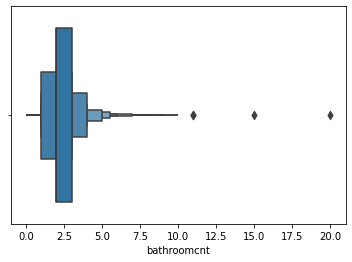

In [11]:
#bathroomcnt	
import seaborn as sns
sns.boxenplot(x = z_data.bathroomcnt)

# Findings - values greater than 10 appear to be outliers, so we will remove these
z_data = z_data[z_data.bathroomcnt <= 10]

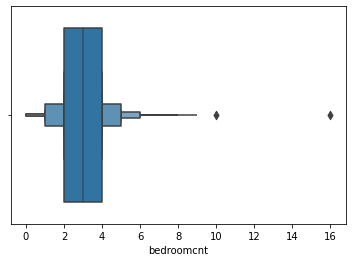

In [12]:
#bedroomcnt
sns.boxenplot(x = z_data.bedroomcnt)

# Findings - values equal to 0 are anamalous, since these are residences.
# # Values greater than 9 appear to be outliers, so we will remove these
z_data = z_data[(z_data.bedroomcnt <= 9) & z_data.bedroomcnt > 0]


<AxesSubplot:xlabel='calculatedbathnbr'>

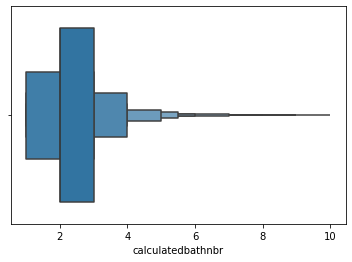

In [13]:
#calclucatedbathnbr	
sns.boxenplot(x = z_data.calculatedbathnbr)

# Findings - After accounting for the previous outliers, we do not see any calculatedbathnbr outliers any longer

C:\Users\david\AppData\Local\Temp/ipykernel_30732/307079285.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


3352.0


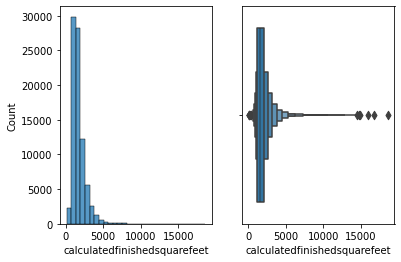

In [15]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#calculatedfinishedsquarefeet	
fig, ax =plt.subplots(1,2)
sns.histplot(z_data.calculatedfinishedsquarefeet, bins = 30, ax = ax[0])
sns.boxenplot(x = z_data.calculatedfinishedsquarefeet, ax = ax[1])
fig.show()

# It's a little difficult to determine our upper bound from this.
# We can conclude that no house will actually be less than 100 sq feet, so we can remove this log, but we'll rely on an IQR calculation to account for upper bound outliers

Q1 = np.percentile(z_data.calculatedfinishedsquarefeet, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(z_data.calculatedfinishedsquarefeet, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UB = Q3 + IQR*1.5
print(UB)

z_data = z_data[z_data.calculatedfinishedsquarefeet > 100]
z_data = z_data[z_data.calculatedfinishedsquarefeet <= UB]


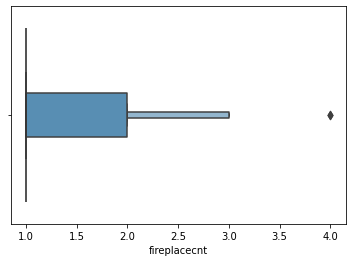

In [16]:
#fireplacecnt	
sns.boxenplot(x = z_data.fireplacecnt)

# Findings - values greater than 3 appear to be outliers, so we will remove these while keeping null values

z_data = z_data[(z_data.fireplacecnt <= 3) | (z_data.fireplacecnt.isnull())]


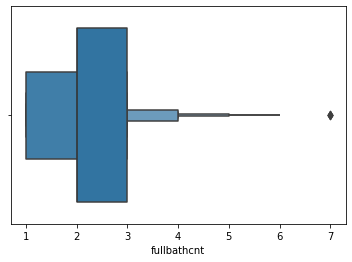

In [17]:
#fullbathcnt	
sns.boxenplot(x = z_data.fullbathcnt)

# Findings - values greater than 4 appear to be outliers, so we will remove these
z_data = z_data[z_data.fullbathcnt <= 4]


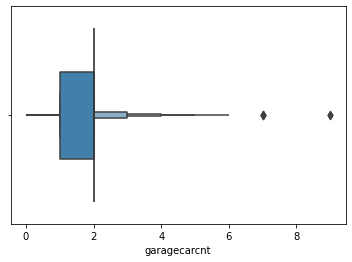

In [18]:
#garagecarcnt	
sns.boxenplot(x = z_data.garagecarcnt)

# Findings - values greater than 5 appear to be outliers, so we will remove these while keeping null values for houses without garages

z_data = z_data[(z_data.garagecarcnt <= 5) | (z_data.garagecarcnt.isnull())]

630.0
294.0


C:\Users\david\AppData\Local\Temp/ipykernel_30732/3249450685.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


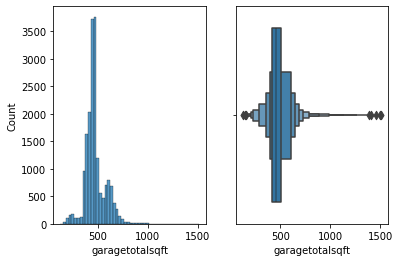

In [19]:
#garagetotalsqft

# We'll rely on IQR to determine upper outliers since there is no clear break point here
# Filtering for only houses with garages to better gauge realistic garage sizes	
fig, ax =plt.subplots(1,2)
sns.histplot(z_data.garagetotalsqft[z_data.garagetotalsqft > 0], bins = 50, ax = ax[0])
sns.boxenplot(x = z_data.garagetotalsqft[z_data.garagetotalsqft > 0], ax = ax[1])
fig.show()

Q1 = np.percentile(z_data.garagetotalsqft[z_data.garagetotalsqft > 0], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(z_data.garagetotalsqft[z_data.garagetotalsqft > 0], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UB = Q3 + IQR*1.5
LB = Q1 - IQR*1.5

print(UB)
print(LB)

# Removing outlier values while keeping null values for houses without garages
z_data = z_data[((z_data.garagetotalsqft.isnull()) | (z_data.garagetotalsqft >= LB)) & ((z_data.garagetotalsqft.isnull()) | (z_data.garagetotalsqft <= UB))]


774.25
200.25


C:\Users\david\AppData\Local\Temp/ipykernel_30732/2456396382.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


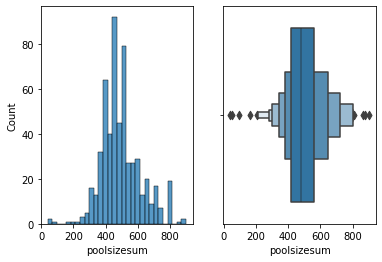

In [20]:
#poolsizesum	
fig, ax =plt.subplots(1,2)
sns.histplot(z_data.poolsizesum, bins = 30, ax = ax[0])
sns.boxenplot(x = z_data.poolsizesum, ax = ax[1])
fig.show()

# We'll rely on IQR to determine upper outliers since there is no clear break point here
# Note that we'll calculate this using only values greater than 0

Q1 = np.percentile(z_data.poolsizesum[z_data.poolsizesum > 0], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(z_data.poolsizesum[z_data.poolsizesum > 0], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UB = Q3 + IQR*1.5
LB = Q1 - IQR*1.5

print(UB)
print(LB)

# Removing outlier values while keeping null values for houses without pools
z_data = z_data[((z_data.poolsizesum.isnull()) | (z_data.poolsizesum >= LB)) & ((z_data.poolsizesum.isnull()) | (z_data.poolsizesum <= UB))]






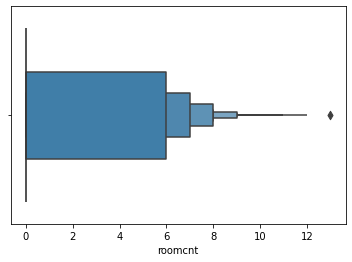

In [21]:
#roomcnt	
sns.boxenplot(x = z_data.roomcnt)

# Findings - values greater than 12 appear to be outliers so we will remove these
# There are also a high number of properties with roomcnt = 0, as seen below
z_data.roomcnt[z_data.roomcnt.isnull()].count()

# We will consider these to be null values instead of homes with 0 rooms. 
z_data = z_data.replace(0, np.nan)
z_data = z_data[(z_data.roomcnt <= 12) | (z_data.roomcnt.isnull())]



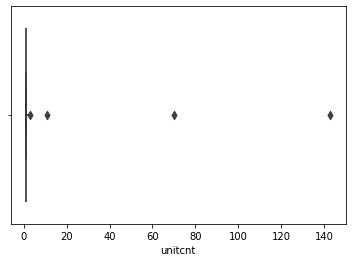

In [22]:
#unitcnt	
sns.boxenplot(x = z_data.unitcnt[z_data.unitcnt > 0])
z_data.unitcnt[z_data.unitcnt > 1].count()

# We only have 18 properties with a unit count greater than 1 after accounting for our other outliers. We'll go ahead and remove these while keeping properties with a null unit count 
z_data = z_data[(z_data.unitcnt == 1) | (z_data.unitcnt.isnull())]



660.0


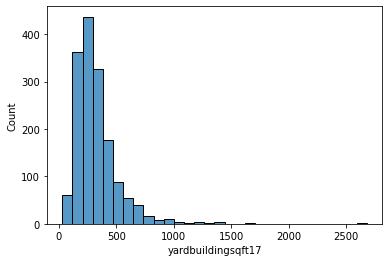

In [23]:
# yardbuildingsqft17 (patio sqft)	
sns.histplot(z_data.yardbuildingsqft17, bins = 30)

# We'll rely on IQR to determine upper outliers since there is no clear break point here
# Note that we'll calculate this using only values greater than 0

Q1 = np.percentile(z_data.yardbuildingsqft17[z_data.yardbuildingsqft17 > 0], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(z_data.yardbuildingsqft17[z_data.yardbuildingsqft17 > 0], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UB = Q3 + IQR*1.5

print(UB)

# Removing outlier values while keeping null values for houses without patios
z_data = z_data[((z_data.yardbuildingsqft17.isnull()) | (z_data.yardbuildingsqft17 <= UB)) ]


514.5


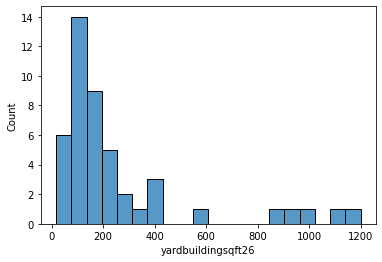

In [24]:
# yardbuildingsqft26 (storage shed sqft)	
sns.histplot(z_data.yardbuildingsqft26, bins = 20)

# We'll rely on IQR to determine upper outliers since there is no clear break point here
# Note that we'll calculate this using only values greater than 0

Q1 = np.percentile(z_data.yardbuildingsqft26[z_data.yardbuildingsqft26 > 0], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(z_data.yardbuildingsqft26[z_data.yardbuildingsqft26 > 0], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UB = Q3 + IQR*1.5

print(UB)

# Removing outlier values while keeping null values for houses without patios
z_data = z_data[((z_data.yardbuildingsqft26.isnull()) | (z_data.yardbuildingsqft26 <= UB))]


In [25]:
#We also dropped these variables because they contained all NA values.
z_data=z_data.drop("finishedsquarefeet13",axis=1)
z_data=z_data.drop("finishedsquarefeet15",axis=1)
z_data=z_data.drop("finishedsquarefeet6",axis=1)
z_data=z_data.drop("buildingclasstypeid",axis=1)

In [26]:
z_data.describe()
total = error.parcelid.count()
cleaned = z_data.parcelid.count()

print('Cleaned percent of total: ',round((cleaned / total)*100,2),'%')



Cleaned percent of total:  75.05 %


###  Conclusion:

The resulting data set is now cleared of 
* duplicates
* anomalous values
* outliers 
    
We're moving forward while retaining roughly 75% of our original data, which will be sufficient for the creation of a model for Zillow prediction accuracy

<br>

<br>

## Section 2.3: Appropriate Statistics for Important Attributes

In [ ]:
z_data.describe()
#The most important variables chosen were roomcnt, bathroomcnt, bedroomcnt, finishedfloor1squarefeet
#, finishedsquarefeet12 and yearbuilt because all were key contributors to the price of the residence.
#For roomcnt, the median was 6 and the mean was approximately 6.6. This is significant because the distribution of 
#room count must be approximately normally distributed. However, there were many missing values for this variable.
#For bedroomcnt and bathroomcnt, the median and mean were also approximately equal and thus, most likely normally distributed.
#For finishedfloor1squarefeet, there were over 60,000 missing values. However, the median and mean were also approximately
#equal and thus, most likely normally distributed. The range was very large at 2900 square feet
#For finishedsquarefeet12, there were no missing values but the mean was approximately 100 sq. ft greater than the median.
#The range was also extremely large at 3232 square feet.
#For yearbuilt, there were no missing values and the mean and median were approximately equal and the range was 30 years.

## Section 2.4: Visualizing Important Attributes

In [ ]:
#The variable roomcnt was chosen because the total number of rooms in the residence usually is good indication of price. 
#Thus, it is a discrete ratio variable so a histogram was appropriate to visualize it.
#The mode is at a room count of 6 and it roughly follows a normal distribution.

sns.histplot(z_data.roomcnt)

In [ ]:
#The variable roomcnt was chosen because the number of bathrooms in the residence usually is contributes to price. 
#Thus, it is a discrete ratio variable so a histogram was appropriate to visualize it. 
#The mode is at a bathroom count of 2 and it is not follow a normal distribution.
sns.histplot(x=z_data.bathroomcnt)


In [ ]:
#The variable roomcnt was chosen because the number of bedrooms in the residence usually is contributes to price. 
#Thus, it is a discrete ratio variable so a histogram was appropriate to visualize it. 
#The mode is at a bedbroom count of 3 and it roughly follows a normal distribution.
sns.histplot(x=z_data.bedroomcnt)

In [ ]:
#The variable finishedfloor1squarefeet was chosen because it represents the size of the finished 
#living area on the first (entry) floor of the home. Thus, it is a continuous ratio variable so a histogram 
#was appropriate to visualize it. The mode is at approximately 1250 square feet and it roughly follows a normal distribution.
sns.histplot(x=z_data.finishedfloor1squarefeet)

In [ ]:
#The variable finishedsquarefeet12 was chosen because it represents the size of the finished total living area.
#Thus, it is a continuous ratio variable so a histogram was appropriate to visualize it. 
#The mode is at approximately 1250 square feet however it does not follow a normal distribution and is right skewed.
sns.histplot(z_data.finishedsquarefeet12)

In [ ]:
#The variable yearbuilt was chosen because the year the residence was built contributes to price.
#Thus, it is a discret ratio variable so a histogram was appropriate to visualize it. 
#Most homes in the dataset were built around 1950 however it does not follow a normal distribution.
sns.histplot(z_data.yearbuilt)

## Section 2.5: Exploring Relationships Between Attributes

In [ ]:
sns.relplot(x = z_data.yearbuilt, y = z_data.calculatedfinishedsquarefeet, kind= "line", height=7, aspect=1.8)

#square footage versus year built- we started off by trying to identify the general trend of 
#square footage increasing with respect to time
#we can also see that the trends line up woth periods of economic downturns
#for example- the great depression occurred in 1929 and coincides with a sharp decrease in the square
#footage of homes built during the time period. This continutes until the end of world war 2 in 1945
#square footage looks to increase until theres another sharp decline during the 1973 oil crisis. 
#homes again increase in square footage until the 2000's and the dot-com bubble, 9/11 attacks, and 
#subprime mortgage crisis

In [ ]:
# we are now looking at the trend of garage square footage with respect to year built- it is very clear that 
# car ownership and hence car storage needs increased with the industrial and automotive boom following
# world war 2. During the late 90's and early 2000's, consumers enjoyed record low gas prices, which 
# quickly rose during the oil boom leading up to the 2007 recession. Here we see that garage sizes 
# have taken a hit in the same time period. 
sns.relplot(x = z_data.yearbuilt, y = z_data.garagetotalsqft, kind="line", height=7, aspect=1.8) #hue=z_data.longitude)

In [ ]:
sns.relplot(x = z_data.roomcnt, y = z_data.lotsizesquarefeet) #hue=z_data.longitude)
#Here we see an interesting relationship between room count and lot size in sq feet. 
# this relatively unimodal distribution is a little surpising as one would have expected homes with
# more rooms to have larger lot sizes.

In [ ]:
sns.jointplot(x=z_data.longitude, y=z_data.latitude)
# This plot of latitudes versus longitudes does a great job of visualizing the actual data points 
# into a map. Few things to note are the absence of data points in the areas known to have mountains
# as well as the outliers to the bottom of the graph that correspond to the City of Avalon on Catalina
# Island. 

In [ ]:
sns.jointplot(x=z_data.longitude, y=z_data.latitude, kind='kde')
# This is a very interesting kernel density plot of the latitudes and longitudes in question
# We can clearly see that the density corresponds to known population centers within the Los Angeles
# Metro and diminishes with respect to distance. 
#kernel density plot

In [ ]:
sns.relplot(x = z_data.longitude, y = z_data.yearbuilt, height=7, aspect=1.8) #hue=z_data.longitude)
# another look at longitude, but this time only against year built, showcasing the rapid expansion
# to all longitudes after starting in sporadic areas in the late 1800s

In [ ]:
sns.relplot(x = z_data.yearbuilt, y = z_data.latitude, height=7, aspect=1.8) #hue=z_data.longitude)
# This graph of latitude versus year built also shows that construction started out in localized 
# pockets but then expanded to all areas

## Section 2.6: Relationships Between Features and Prediction Grade

In [ ]:
sns.scatterplot(x=z_data.taxamount, y=z_data.yearbuilt, hue=z_data.Prediction_Grade)

In [ ]:
sns.boxplot(x = z_data.Prediction_Grade, y = z_data.yearbuilt)
# Our first interesting relationship between features and the class is that there is a correlation between better 
# Prediction grades and new home builds. This is very well visualized in the box plot below: the median
# , Q1 and Q3 for Prediction Grade A are the highest among all of the grades. Furthermore the median and Q1 of the F
# grades are the lowest in terms of year built. 

In [ ]:
sns.boxplot(x = z_data.Prediction_Grade, y = z_data.bathroomcnt)
# Another relationship we see is between bathroom count and prediction grade: the best prediction grades tend to be localized 
# in the 2-3 range while the worst tend to be within the 1-2 range. 

In [ ]:
sns.boxplot(x = z_data.Prediction_Grade, y = z_data.roomcnt)
# Here we see the sweet spot between prediction grade and room counts tends to be 6-8. This relationship
# is a little more difficult to understand as both C and failing grades have very similar room counts.

## Section 2.7: Opportunities for Additional Features

                              parcelid  basementsqft  bathroomcnt  bedroomcnt  \
parcelid                      1.000000      0.006557     0.027858    0.138766   
basementsqft                  0.006557      1.000000     0.010848    0.011452   
bathroomcnt                   0.027858      0.010848     1.000000    0.499075   
bedroomcnt                    0.138766      0.011452     0.499075    1.000000   
buildingqualitytypeid         0.268314      0.001963    -0.356518   -0.007946   
calculatedbathnbr             0.027858      0.010848     1.000000    0.499075   
decktypeid                         NaN           NaN          NaN         NaN   
finishedfloor1squarefeet      0.060809      0.014511     0.035228    0.063209   
calculatedfinishedsquarefeet  0.094882      0.006222     0.707036    0.645599   
finishedsquarefeet12          0.094882      0.006222     0.707036    0.645599   
finishedsquarefeet50          0.059895      0.004303     0.034425    0.059278   
fips                        

<AxesSubplot:>

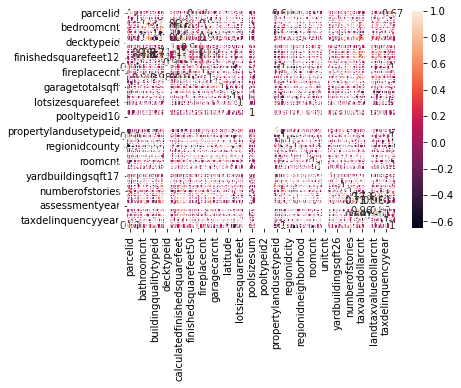

In [85]:
#We used a correlation matrix and heatmap to determine which variables were correlated with one another
#and with the response, Prediction Grade.
corr_matrix = z_data.corr()
print(corr_matrix)

#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)
#The two features that would be helpful to add are 
#A feature that would be helpful to add is the interaction talndtaxvaluedollarcnt*taxamount because both relate to 
#the property tax assessed for a particular year.
#Another feature that could be added is finishedsquarefeet50* finishedfloor1squarefeet because both relate to the 
#size of the finished living area on the first (entry) floor of the home.

## Section 2.8: Exceptional Work (Probably Dimensionality Reduction)

In [83]:
#We implemented PCA for dimensionality reduction
from sklearn.decomposition import PCA
import statistics
#Using only numeric predictors
z_dataPCA=z_data.iloc[:,[0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,29,31,32,33,34,35,36,38,40,41,42,43,44,46,47,48,49,50,52,53]]



#filling na values with median from each column
z_dataPCA = z_dataPCA.fillna(z_dataPCA.median())

X = z_dataPCA
y=z_data["Prediction Grade"]


pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X) # fit data and then transform it



# print the components

print ('pca:', pca.components_)

pca: [[ 8.13160730e-06  4.13243653e-13  3.17928323e-13  1.00690701e-12
   2.84927446e-12  3.17928323e-13 -0.00000000e+00  6.34098515e-11
   5.11797982e-10  5.11797982e-10  6.47565323e-11  1.00737487e-10
   1.14615425e-13  2.59980621e-14 -1.95442581e-13  2.22070992e-11
  -1.56711132e-07 -4.72094069e-07 -5.82326605e-08 -0.00000000e+00
   1.82446980e-12 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -2.80345917e-12  9.99347670e-07 -1.11433396e-08 -2.68378415e-09
  -7.88965553e-09  1.04609661e-09 -5.99699943e-13  9.35135137e-16
  -0.00000000e+00  9.28192521e-12  3.69035791e-13  2.01625370e-11
   6.45456353e-13  4.33163024e-08  7.52497595e-08 -0.00000000e+00
   3.19334571e-08 -4.61283844e-10  2.88369947e-14  1.00000000e+00]
 [ 9.96920821e-01 -4.64258912e-09 -1.46439678e-08  5.82769953e-09
   9.25196103e-08 -1.46439680e-08  0.00000000e+00 -1.23285844e-06
  -4.38828453e-06 -4.38828453e-06 -1.29572576e-06  8.79823053e-08
  -2.39924634e-10 -2.09783492e-08 -1.55646865e-09  3.55067512e-07
  -4